## Visualizing Filters of a Convolutional Neural Network

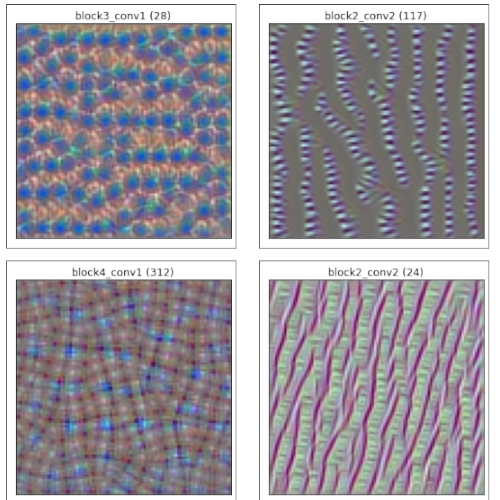

## Task 2: Downloading the Model

In [1]:
import tensorflow as tf
import random 
import matplotlib.pyplot as plt

print("TensorFlow version", tf.__version__)

TensorFlow version 2.8.2


In [2]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(96,96,3)
)

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

## Task 3: Get Layer Output

In [3]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input, 
      model.get_layer(layer_name).output
  )

get_submodel("block1_conv2").summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [10]:
def create_image():
  return tf.random.uniform((96, 96, 3), minval = -0.5, maxval = 0.5)

def plot_image(image, title="random"):
  image = image - tf.math.reduce_min(image) # min of all pixels = 0
  image = image/tf.math.reduce_max(image) # All pixels in [0,1]
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

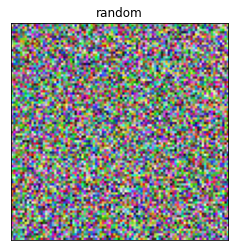

In [11]:
image = create_image()
plot_image(image)

## Task 5: Training Loop

In [6]:
def visualize_filter(layer_name, f_index=None, iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters - 1)
  assert num_filters > f_index, 'f_index is out of bounds'

  image = create_image()
  verbose_step = int(iters/10)

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads * 10

    if (i + 1) % verbose_step == 0:
      print(f"Iteration: {i + 1}, Loss: {loss.numpy():.4f}")
  
  plot_image(image, f'{layer_name}, {f_index}')



## Task 6: Final Results

In [7]:
print([layer.name for layer in model.layers if "conv" in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10, Loss: 76.0237
Iteration: 20, Loss: 139.0840
Iteration: 30, Loss: 210.2315
Iteration: 40, Loss: 293.8006
Iteration: 50, Loss: 386.1798
Iteration: 60, Loss: 483.9530
Iteration: 70, Loss: 584.0154
Iteration: 80, Loss: 685.6245
Iteration: 90, Loss: 788.2803
Iteration: 100, Loss: 892.0850


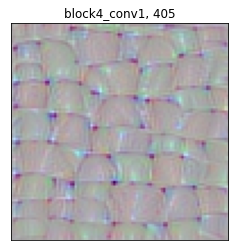

In [23]:
layer_name = "block4_conv1" #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, iters=100)

In [24]:
x = tf.convert_to_tensor(2.0)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x * x - 2
  z = y * x

grads = tape.gradient(z, x)

In [25]:
print(grads)

tf.Tensor(10.0, shape=(), dtype=float32)
